In [11]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [3]:
X, y = load_boston(return_X_y=True)

df_boston =  pd.DataFrame(X,columns=load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
import seaborn as sns
corr = df_boston.corr()


In [9]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


(13.5, -0.5)

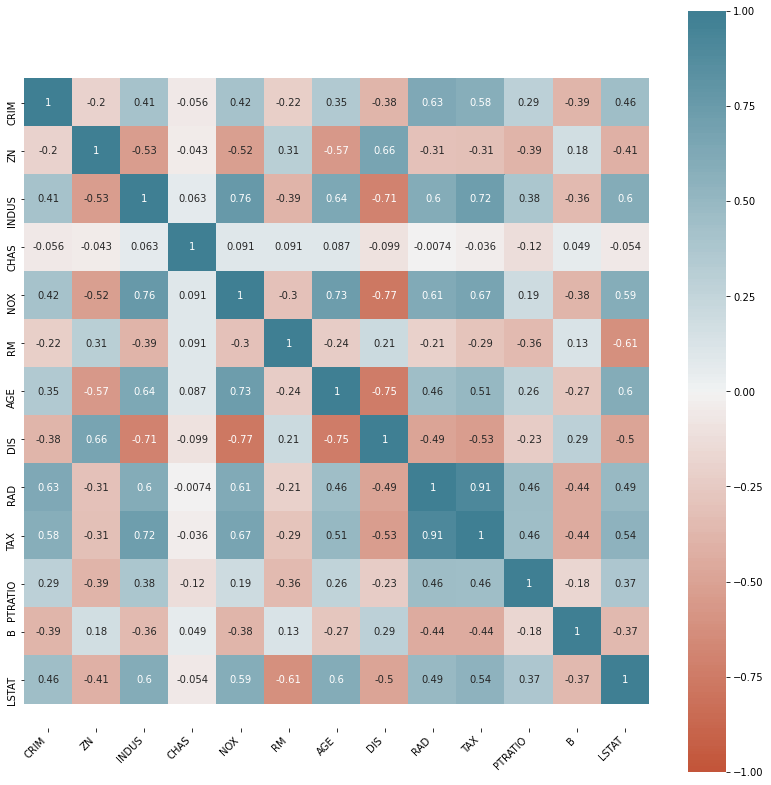

In [12]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7434997532004697
Score of the test set 0.7112260057484974


In [18]:
importance = modelb.coef_
for i in range(len(importance)):
    print("Feature", df_boston.columns[i], "Score:", importance[i])

Feature CRIM Score: -0.13347010285294458
Feature ZN Score: 0.03580891359323345
Feature INDUS Score: 0.04952264522005847
Feature CHAS Score: 3.119835116285383
Feature NOX Score: -15.417060895306879
Feature RM Score: 4.057199231645367
Feature AGE Score: -0.010820835184929722
Feature DIS Score: -1.3859982431608764
Feature RAD Score: 0.24272733982224778
Feature TAX Score: -0.008702234365662913
Feature PTRATIO Score: -0.9106852081102895
Feature B Score: 0.011794115892569896
Feature LSTAT Score: -0.5471133128239618


In [ ]:
#preprocessing

In [27]:
#dropping some features that is not important for our dataset(noises)
new_df = df_boston.drop(["AGE","INDUS"],axis=1)

In [29]:
#splitting new(dropped) dataset to train and test 0.7-0.3
X_train, X_test, y_train, y_test = train_test_split(new_df,y, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=True)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7428288884259309
Score of the test set 0.7149039348907362


In [31]:
#detecting and eliminating outliers of our dataset
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_boston))
outliers = list(set(np.where(z > 3)[0])) #since we used absolute value above
new_df = df_boston.drop(outliers,axis = 0).reset_index(drop = False) 
y_new = y[list(new_df["index"])] 
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#Regularized Ridge&Lasso Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#alfa_1
ridge_model = Ridge(alpha = 0.02)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Simple Train:  0.7598701100873174
Simple Test:  0.6739782514175502
*************************
Lasso Train:  0.7598692468218982
Lasso Test:  0.6738463239205922
*************************
Ridge Train:  0.7598701031430238
Ridge Test:  0.6739739047270429


In [36]:
#alfa_2
ridge_model = Ridge(alpha = 0.2)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Simple Train:  0.7598701100873174
Simple Test:  0.6739782514175502
*************************
Lasso Train:  0.7546769864479325
Lasso Test:  0.6583946315771073
*************************
Ridge Train:  0.7598694237739457
Ridge Test:  0.6739352226385357


In [37]:
#alfa_3
ridge_model = Ridge(alpha = 0.002)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(X_train, y_train)

#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Simple Train:  0.7598701100873174
Simple Test:  0.6739782514175502
*************************
Lasso Train:  0.7245085874936562
Lasso Test:  0.6455555974429235
*************************
Ridge Train:  0.7598701100177923
Ridge Test:  0.6739778163077274


In [38]:
#alfa_4
ridge_model = Ridge(alpha = 0.003)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.7)
lasso_model.fit(X_train, y_train)

#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Simple Train:  0.7598701100873174
Simple Test:  0.6739782514175502
*************************
Lasso Train:  0.7159577935290886
Lasso Test:  0.6435947011228498
*************************
Ridge Train:  0.7598701099308961
Ridge Test:  0.6739775987895659


In [39]:
#alfa_5
ridge_model = Ridge(alpha = 0.9)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.9)
lasso_model.fit(X_train, y_train)

#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Simple Train:  0.7598701100873174
Simple Test:  0.6739782514175502
*************************
Lasso Train:  0.7076847186654325
Lasso Test:  0.6421278134068328
*************************
Ridge Train:  0.759856815775036
Ridge Test:  0.6737920809408089


comparison of 5 different alpha values show us that;   
- our score dicrease dramatically while alpha getting closer to 1 in Lasso regression  
- our score changes slightly while alpha is getting bigger or smaller but as we can see we got the best score when alpha is closer to the 0 in Ridge regression.

